In [7]:
import sympy as sp
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [9]:
# Define symbols
z_sym = sp.symbols('z')
beta_sym = sp.symbols('beta')

# Define the softplus squared expression, its first and second derivatives
softplus_squared = (1 / (2 * beta_sym**4)) * sp.log(1 + sp.exp(beta_sym**2 * z_sym))**2
first_derivative = sp.diff(softplus_squared, z_sym)
second_derivative = sp.diff(first_derivative, z_sym)
print("SoftplusSquared Function:") 
display(softplus_squared)
print("\nFirst Derivative:")
display(first_derivative)
print("\nSecond Derivative:")
display(second_derivative)

# Lambdify the expressions to use them with numpy
softplus_func = sp.lambdify((z_sym, beta_sym), softplus_squared, modules='numpy')
first_derivative_func = sp.lambdify((z_sym, beta_sym), first_derivative, modules='numpy')
second_derivative_func = sp.lambdify((z_sym, beta_sym), second_derivative, modules='numpy')

def plot_softplus(beta=1.0):
    z = np.linspace(-5, 5, 100)
    softplus_vals = softplus_func(z, beta)
    first_derivative_vals = first_derivative_func(z, beta)
    second_derivative_vals = second_derivative_func(z, beta)
    # Plot the function and its derivatives
    plt.figure(figsize=(6, 4))
    plt.plot(z, softplus_vals, label="SoftplusSquared", linewidth=2)
    plt.plot(z, first_derivative_vals, label="1st Derivative", linestyle="--", linewidth=2)
    plt.plot(z, second_derivative_vals, label="2nd Derivative", linestyle=":", linewidth=2)
    plt.title(f"SoftplusSquared Function and its Derivatives (β = {beta:.2f})")
    plt.xlabel("z")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# Create an interactive slider for beta
interact(plot_softplus, beta=FloatSlider(value=1, min=.1, max=20, step=0.1, description='β'));

SoftplusSquared Function:


log(exp(beta**2*z) + 1)**2/(2*beta**4)


First Derivative:


exp(beta**2*z)*log(exp(beta**2*z) + 1)/(beta**2*(exp(beta**2*z) + 1))


Second Derivative:


exp(beta**2*z)*log(exp(beta**2*z) + 1)/(exp(beta**2*z) + 1) - exp(2*beta**2*z)*log(exp(beta**2*z) + 1)/(exp(beta**2*z) + 1)**2 + exp(2*beta**2*z)/(exp(beta**2*z) + 1)**2

interactive(children=(FloatSlider(value=1.0, description='β', max=20.0, min=0.1), Output()), _dom_classes=('wi…

In [10]:

class SoftplusSquared(torch.nn.Module):
    def __init__(self, beta=1.0):
        super(SoftplusSquared, self).__init__()
        self.beta = beta
    def forward(self, z):
        beta_squared = self.beta ** 2
        return (1 / (2 * beta_squared**2)) * torch.log(1 + torch.exp(beta_squared * z))**2

def plot_softplus_squared(beta):
    z = torch.linspace(-5, 5, 500, requires_grad=True)
    softplus_squared = SoftplusSquared(beta=beta)
    y = softplus_squared(z)
    y.backward(torch.ones_like(z), create_graph=True)  
    first_derivative = z.grad.clone()  
    z.grad.zero_()  
    first_derivative.sum().backward()  
    second_derivative = z.grad.clone()  

    # Convert to numpy for plotting
    z_np = z.detach().numpy()
    y_np = y.detach().numpy()
    first_derivative_np = first_derivative.detach().numpy()
    second_derivative_np = second_derivative.detach().numpy()
    # Plot the function and its derivatives
    plt.figure(figsize=(10, 6))
    plt.plot(z_np, y_np, label="SoftplusSquared", linewidth=2)
    plt.plot(z_np, first_derivative_np, label="1st Derivative", linestyle="--", linewidth=2)
    plt.plot(z_np, second_derivative_np, label="2nd Derivative", linestyle=":", linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='dotted')
    plt.title(f"SoftplusSquared Function and its Derivatives (beta={beta})")
    plt.xlabel("z")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()
interact(plot_softplus_squared, beta=widgets.FloatSlider(value=1.0, min=0.1, max=20.0, step=0.1))


interactive(children=(FloatSlider(value=1.0, description='beta', max=20.0, min=0.1), Output()), _dom_classes=(…

<function __main__.plot_softplus_squared(beta)>

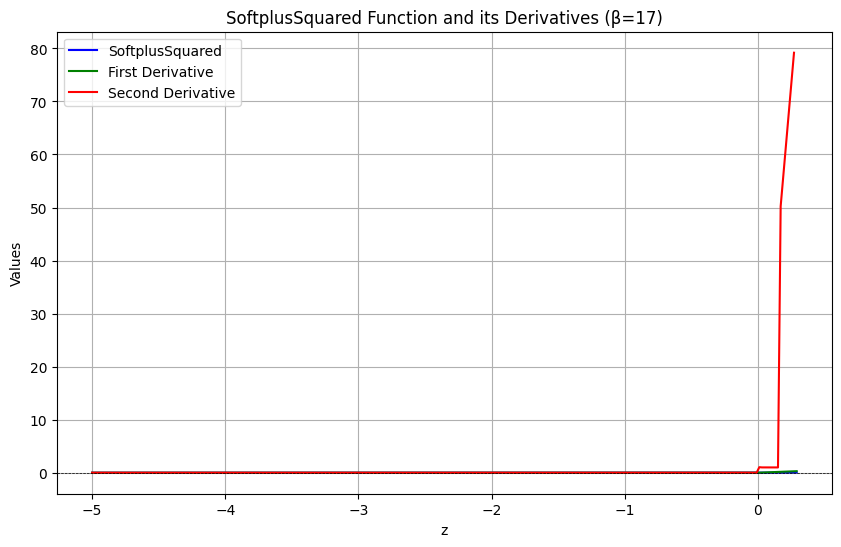

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

class SoftplusSquared(torch.nn.Module):
    def __init__(self, beta=1.0):
        super(SoftplusSquared, self).__init__()
        self.beta = beta

    def forward(self, z):
        beta_squared = self.beta ** 2
        return (1 / (2 * beta_squared**2)) * torch.log(1 + torch.exp(beta_squared * z))**2

# Initialize the module
beta_value = 17
softplus_squared = SoftplusSquared(beta=beta_value)

# Generate input values
z = torch.linspace(-5, 5, 500, requires_grad=True)  # Input tensor with gradients enabled
output = softplus_squared(z)

# Compute the first derivative
first_derivative = torch.autograd.grad(outputs=output, inputs=z, grad_outputs=torch.ones_like(output), create_graph=True)[0]

# Compute the second derivative
second_derivative = torch.autograd.grad(outputs=first_derivative, inputs=z, grad_outputs=torch.ones_like(first_derivative))[0]

# Convert tensors to numpy for plotting
z_np = z.detach().numpy()
output_np = output.detach().numpy()
first_derivative_np = first_derivative.detach().numpy()
second_derivative_np = second_derivative.detach().numpy()

# Plotting
plt.figure(figsize=(10, 6))

# Original function
plt.plot(z_np, output_np, label="SoftplusSquared", color="blue")

# First derivative
plt.plot(z_np, first_derivative_np, label="First Derivative", color="green")

# Second derivative
plt.plot(z_np, second_derivative_np, label="Second Derivative", color="red")

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title(f"SoftplusSquared Function and its Derivatives (β={beta_value})")
plt.xlabel("z")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()
